## Final Project Combined Preliminary EDA

In [1]:
# import libraries

import numpy as np
from numpy import errstate,isneginf
import pandas as pd
from time import time
from datetime import datetime
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import re as re
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(style = 'white')

%matplotlib inline

## Installing Reverse Geocoder
This helps us get county and city data against longtitude and latitude zillow data. Source: https://github.com/thampiman/reverse-geocoder

In [2]:
# only need to install one time if new
# !pip install reverse_geocoder
import reverse_geocoder as rg

## Reading in Data

In [3]:
# load the data
train_2016 = pd.read_csv("train_2016_v2.csv")
properties_2016 = pd.read_csv("properties_2016.csv")

C:\Users\ehuang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Properties Data EDA

In [4]:
# look at properties 2016 dataframe
properties_2016.describe(include='all').transpose().sort_values(by='count')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
storytypeid,1624,NaN,NaN,NaN,7,0,7,7,7,7,7
basementsqft,1628,NaN,NaN,NaN,646.883,538.793,20,272,534,847.25,8516
yardbuildingsqft26,2647,NaN,NaN,NaN,278.297,369.732,10,96,168,320,6141
fireplaceflag,5163,1,True,5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,6061,NaN,NaN,NaN,7.20261,2.43629,2,7,7,7,27
typeconstructiontypeid,6747,NaN,NaN,NaN,5.99956,0.38405,4,6,6,6,13
finishedsquarefeet13,7672,NaN,NaN,NaN,1178.9,357.073,120,960,1296,1440,2688
buildingclasstypeid,12629,NaN,NaN,NaN,3.72595,0.5017,1,3,4,4,5
decktypeid,17096,NaN,NaN,NaN,66,0,66,66,66,66,66
finishedsquarefeet6,22001,NaN,NaN,NaN,2414.34,7695.3,117,1079,1992,3366,952576


In [5]:
# Drop sparsely populated columns
properties_2016.drop(labels=['storytypeid','basementsqft','yardbuildingsqft26','architecturalstyletypeid',
                'architecturalstyletypeid','finishedsquarefeet13','buildingclasstypeid','finishedsquarefeet6',
               'finishedsquarefeet15','finishedsquarefeet50','finishedfloor1squarefeet'], axis=1,inplace=True)

# drop categorical columns for now
properties_2016.drop(labels=['airconditioningtypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 'heatingorsystemtypeid', 
                'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 
                'regionidneighborhood', 'regionidzip', 'typeconstructiontypeid', 'censustractandblock'], 
        axis=1,inplace=True)

# drop those with no variation or those covered by other categories
properties_2016.drop(labels=['propertycountylandusecode', 'propertyzoningdesc','fireplaceflag','assessmentyear','taxdelinquencyyear'], 
        axis=1,inplace=True)

properties_2016.set_index(keys='parcelid',inplace=True)

In [6]:
properties_2016.dtypes.transpose()

bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
pooltypeid10                    float64
pooltypeid2                     float64
pooltypeid7                     float64
roomcnt                         float64
threequarterbathnbr             float64
unitcnt                         float64
yardbuildingsqft17              float64
yearbuilt                       float64
numberofstories                 float64
structuretaxvaluedollarcnt      float64


In [11]:
# standardize and convert data to 1 or 0
def convert_yn(x):
    if x in ['True','Y']:
        return 1
    return 0

properties_2016['hashottuborspa'] = properties_2016['hashottuborspa'].map(convert_yn)
properties_2016['taxdelinquencyflag'] = properties_2016['taxdelinquencyflag'].map(convert_yn)

In [12]:
# transform columns with very large st dev to log
with errstate(divide='ignore'):
    properties_2016['structuretaxvaluedollarcnt'] = np.log10(properties_2016['structuretaxvaluedollarcnt'])
    properties_2016['taxvaluedollarcnt'] = np.log10(properties_2016['taxvaluedollarcnt'])
    properties_2016['landtaxvaluedollarcnt'] = np.log10(properties_2016['landtaxvaluedollarcnt'])
    properties_2016['taxamount'] = np.log10(properties_2016['taxamount'])
    properties_2016['lotsizesquarefeet'] = np.log10(properties_2016['lotsizesquarefeet'])
    properties_2016['garagetotalsqft'] = np.log10(properties_2016['garagetotalsqft'])

C:\Users\ehuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


In [13]:
properties_2016['structuretaxvaluedollarcnt'][isneginf(properties_2016['structuretaxvaluedollarcnt'])]=0
properties_2016['taxvaluedollarcnt'][isneginf(properties_2016['taxvaluedollarcnt'])]=0
properties_2016['landtaxvaluedollarcnt'][isneginf(properties_2016['landtaxvaluedollarcnt'])]=0
properties_2016['taxamount'][isneginf(properties_2016['taxamount'])]=0
properties_2016['lotsizesquarefeet'][isneginf(properties_2016['lotsizesquarefeet'])]=0
properties_2016['garagetotalsqft'][isneginf(properties_2016['garagetotalsqft'])]=0

C:\Users\ehuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ehuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ehuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ehuang\

In [14]:
properties_2016.shape
properties_2016.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,...,threequarterbathnbr,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag
count,2.973755e+06,2.973767e+06,2.856305e+06,2.929652e+06,2.709184e+06,312637.000000,2.856305e+06,883267.000000,686515.000000,2985217.0,...,311631.000000,1.977490e+06,80355.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.917484e+06,2.953967e+06,2985217.0
mean,2.209143e+00,3.088949e+00,2.299263e+00,1.827162e+03,1.760001e+03,1.168710,2.244165e+00,1.823517,0.427556,0.0,...,1.010009,1.181171e+00,319.803397,1.964262e+03,1.401464,7.042496e-01,7.349787e-01,7.105418e-01,5.508785e-01,0.0
std,1.077754e+00,1.275859e+00,1.000736e+00,1.819780e+03,9.710610e+02,0.461273,9.912054e-01,0.610035,0.017796,0.0,...,0.117709,2.447896e+00,233.086314,2.344132e+01,0.539076,3.341536e-02,3.849298e-02,4.591147e-02,4.822749e-02,0.0
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.106787,0.0,...,1.000000,1.000000e+00,10.000000,1.801000e+03,1.000000,-5.213902e-01,-5.213902e-01,-5.213902e-01,-8.958381e-01,0.0
25%,2.000000e+00,2.000000e+00,2.000000e+00,1.213000e+03,1.196000e+03,1.000000,2.000000e+00,2.000000,0.419351,0.0,...,1.000000,1.000000e+00,190.000000,1.950000e+03,1.000000,6.878768e-01,7.205304e-01,6.878954e-01,5.303437e-01,0.0
50%,2.000000e+00,3.000000e+00,2.000000e+00,1.572000e+03,1.539000e+03,1.000000,2.000000e+00,2.000000,0.425332,0.0,...,1.000000,1.000000e+00,270.000000,1.963000e+03,1.000000,7.065859e-01,7.392434e-01,7.179055e-01,5.564432e-01,0.0
75%,3.000000e+00,4.000000e+00,3.000000e+00,2.136000e+03,2.070000e+03,1.000000,3.000000e+00,2.000000,0.436543,0.0,...,1.000000,1.000000e+00,390.000000,1.981000e+03,2.000000,7.238021e-01,7.549916e-01,7.393367e-01,5.789212e-01,0.0
max,2.000000e+01,2.000000e+01,2.000000e+01,9.525760e+05,2.903450e+05,9.000000,2.000000e+01,25.000000,0.589865,0.0,...,7.000000,9.970000e+02,7983.000000,2.015000e+03,41.000000,9.243059e-01,9.269316e-01,9.006636e-01,8.155069e-01,0.0


## Train Data ETA

In [15]:
train_2016.transactiondate = pd.to_datetime(train_2016.transactiondate, infer_datetime_format=True)
train_2016.set_index(keys='parcelid',inplace=True)
print(train_2016.shape)
print(train_2016.dtypes)

(90275, 2)
logerror                  float64
transactiondate    datetime64[ns]
dtype: object


## Merge train + properties data

In [16]:
# create the train and dev subsets from 2016 data
df = properties_2016.merge(train_2016,how='inner',left_index=True,right_index=True, copy='False')

df.fillna(0,inplace=True)

## <font color=red> Should merge in Geocode data here from Ray + Ellie's notebook here </font>

## Split dataset into train and dev

In [17]:
# split the dataset into train and dev
df = shuffle(df)

train_data, train_labels = df.iloc[int(len(df)/2):, 0:29], df.iloc[int(len(df)/2):, 29:30].values
df_train = df.iloc[int(len(df)/2):, :]
dev_data, dev_labels = df.iloc[:int(len(df)/2), 0:29], df.iloc[:int(len(df)/2), 29:30].values
print(train_data.shape)


(45138, 29)


## <font color=red> This is the start of feature exploration, selection, and engineering... </font>

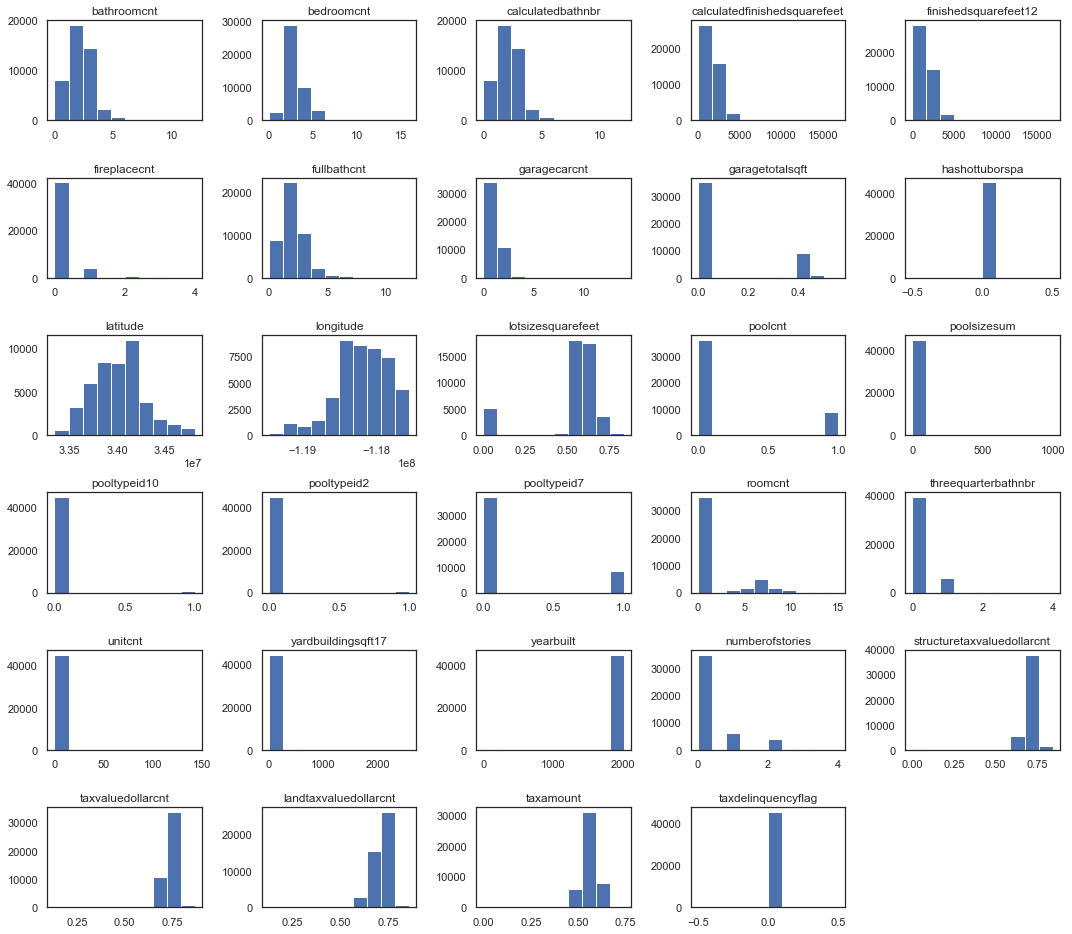

In [20]:
# plot distribution histograms of features 
def plt_hist(df,row,col,cnt):
    fig, ax = plt.subplots(row,col, figsize=(15,15))
    ax = ax.flatten()
    i = 0
    for c in df.columns:
        ax[i].hist(df[c])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
        ax[i].set_title(c)
        i+=1
    if cnt < row*col:
        for i in range(cnt,row*col):
            plt.delaxes(ax[i])
    plt.tight_layout()

plt_hist(df_train,7,5,len(df_train.columns)-2)

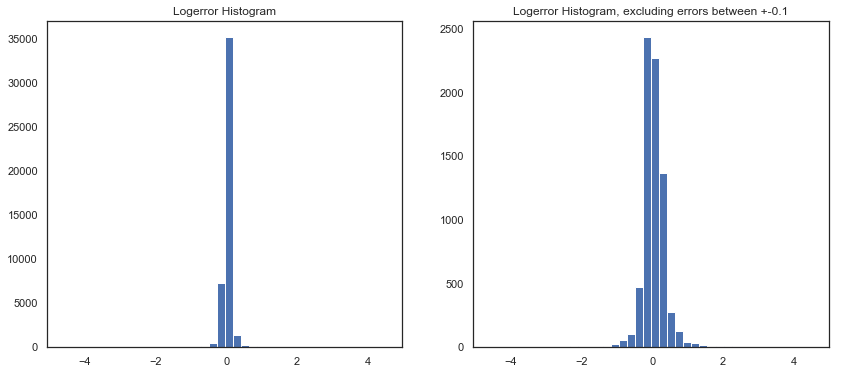

In [21]:
# plot histograms of Logerrors
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax.flatten()
ax[0].hist(df_train.logerror,bins=40)
ax[0].set_title("Logerror Histogram")
ax[1].hist(df_train.logerror[np.abs(df_train.logerror) >= 0.1],bins=40)
ax[1].set_title("Logerror Histogram, excluding errors between +-0.1")
plt.show()

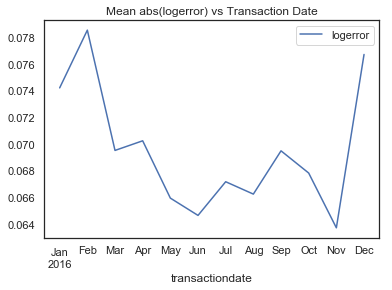

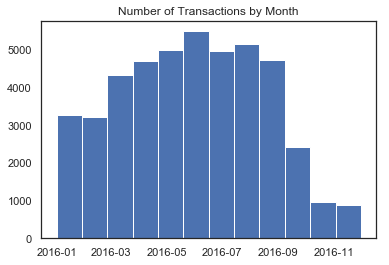

In [22]:
# plot logerrors over time
plt_df = df_train[['transactiondate','logerror']].copy()
plt_df['transactiondate'] = plt_df.transactiondate.astype('datetime64[M]')
plt_df['logerror'] = np.abs(plt_df.logerror)
g = plt_df.groupby(['transactiondate']).mean()
g.plot()
plt.title("Mean abs(logerror) vs Transaction Date")
plt.show()
plt.hist(plt_df.transactiondate,bins=12)
plt.title("Number of Transactions by Month")
plt.show()

In [23]:
# make new dataframe with absolute logerror
new_df = df_train.copy()

new_df['transactiondate'] = new_df.transactiondate.astype('datetime64[M]')
new_df['abs_logerror'] = np.abs(new_df.logerror)
new_df = new_df[new_df.transactiondate == '2016-12-01']
new_df.sort_values(by=['abs_logerror'],inplace=True, ascending=False)

new_df.head(8).transpose()

parcelid,11557016,12521809,13041469,14448519,11579451,12288090,13874008,11935401
bathroomcnt,2,2,1,2,2,2,0,5
bedroomcnt,3,3,3,3,3,4,0,6
calculatedbathnbr,2,2,1,2,2,2,0,5
calculatedfinishedsquarefeet,1417,994,1052,1549,1843,1565,3071,3438
finishedsquarefeet12,1417,994,1052,1549,1843,1565,0,0
fireplacecnt,0,0,0,0,0,0,0,0
fullbathcnt,2,2,1,2,2,2,0,5
garagecarcnt,0,0,0,0,0,0,0,0
garagetotalsqft,0,0,0,0,0,0,0,0
hashottuborspa,0,0,0,0,0,0,0,0
